In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Soft\Desktop\Py\Docs\airline data\Invistico_Airline.csv")

In [3]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df["satisfaction"].value_counts()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [6]:
df["Gender"].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [7]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

In [8]:
df["Type of Travel"].value_counts()

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

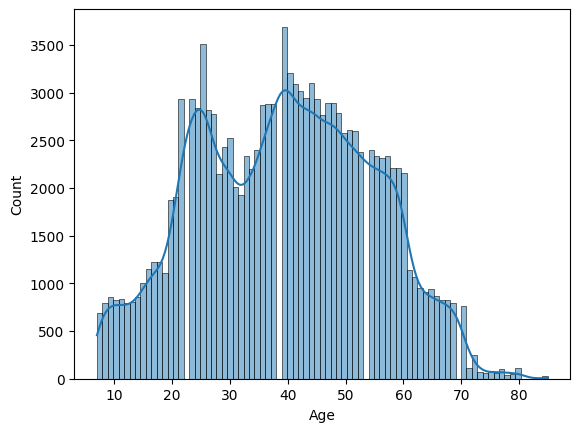

In [9]:
sns.histplot(df["Age"], kde=True)

<Axes: >

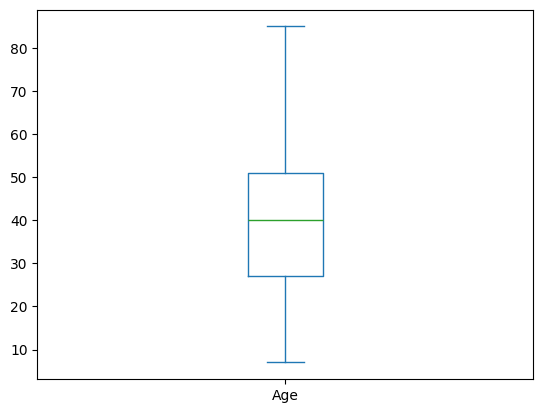

In [10]:
df["Age"].plot.box()

<Axes: xlabel='Flight Distance', ylabel='Count'>

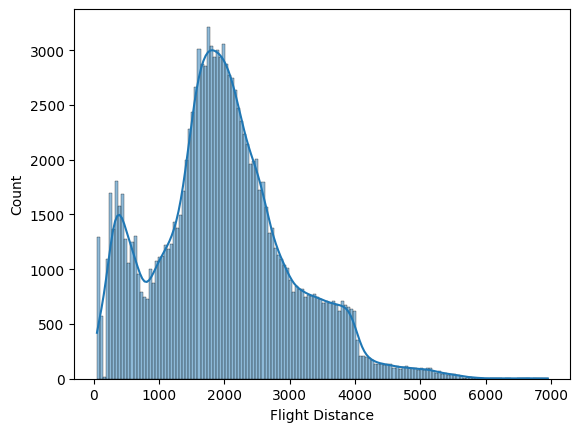

In [11]:
sns.histplot(df["Flight Distance"], kde=True)

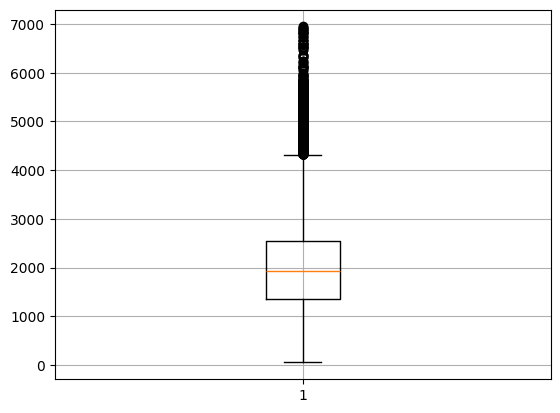

In [12]:
plt.boxplot(df["Flight Distance"])
plt.grid(visible=True)
plt.show()

In [13]:
dummy = df["Flight Distance"].quantile(0.977)

In [14]:
df = df[df["Flight Distance"] <= dummy]

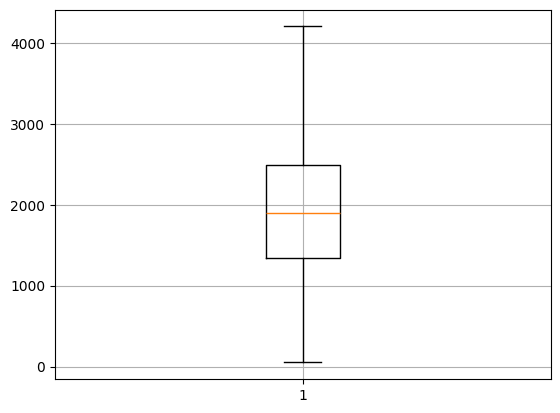

In [15]:
plt.boxplot(df["Flight Distance"])
plt.grid(visible=True)
plt.show()

<Axes: ylabel='Frequency'>

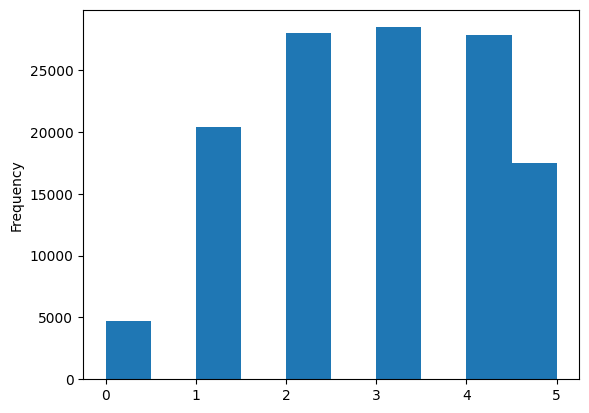

In [16]:
df["Seat comfort"].plot.hist()

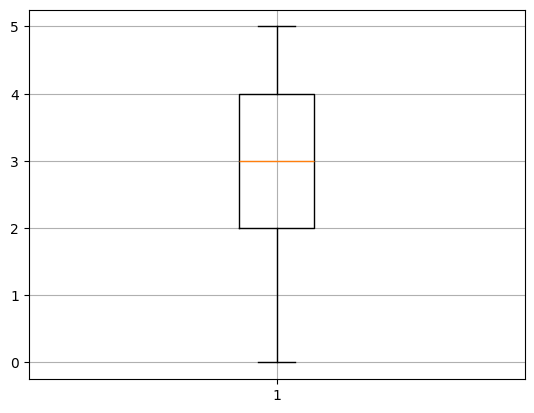

In [17]:
plt.boxplot(df["Seat comfort"])
plt.grid(visible=True)
plt.show()

In [18]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,126896.000000,126896.000000,126896.000000,126896.00000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126896.000000,126520.000000
mean,39.668981,1914.669737,2.840413,2.99074,2.849152,2.989606,3.242301,3.378822,3.518298,3.470787,3.470086,3.490402,3.695680,3.341997,3.708100,3.347190,14.146427,14.527924
std,15.126998,938.325817,1.394102,1.52885,1.443408,1.303912,1.319753,1.348232,1.308372,1.307125,1.269992,1.291948,1.156963,1.260086,1.151048,1.299965,36.217608,36.671598
min,7.000000,50.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1337.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1901.000000,3.000000,3.00000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,2489.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4204.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<Axes: >

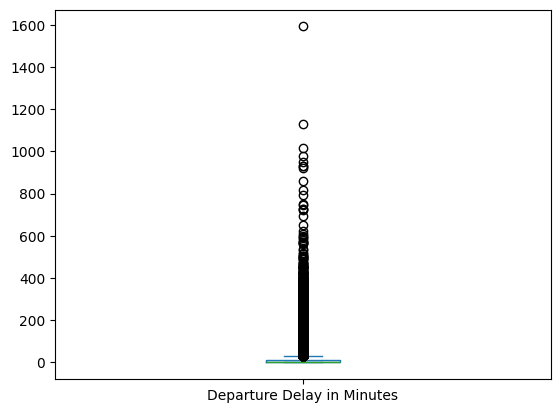

In [19]:
df["Departure Delay in Minutes"].plot.box()

In [20]:
df["Dept_Delay"] = df["Departure Delay in Minutes"]
df.drop("Departure Delay in Minutes", axis=1, inplace=True)

In [21]:
dummy = df["Dept_Delay"].quantile(0.9)

<Axes: >

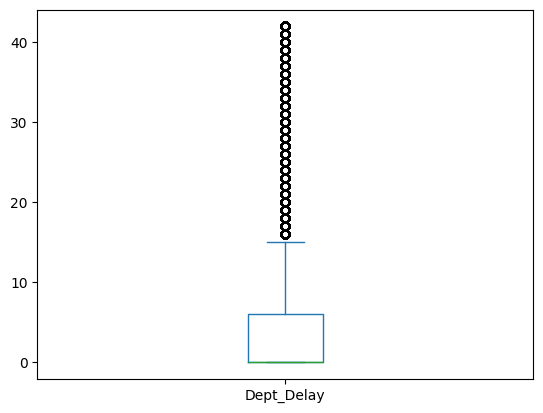

In [22]:
df[df["Dept_Delay"]<=dummy]["Dept_Delay"].plot.box()

In [23]:
df= df[df["Dept_Delay"]<=dummy]

In [24]:
df.shape

(114220, 23)

In [25]:
df["Arr_Delay"] = df["Arrival Delay in Minutes"]
df.drop("Arrival Delay in Minutes", axis=1, inplace=True)

In [26]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0


<Axes: >

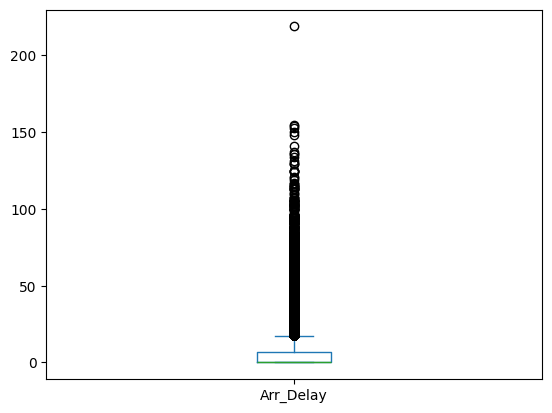

In [27]:
df["Arr_Delay"].plot.box()

In [28]:
dummy = df["Arr_Delay"].quantile(0.95)

<Axes: >

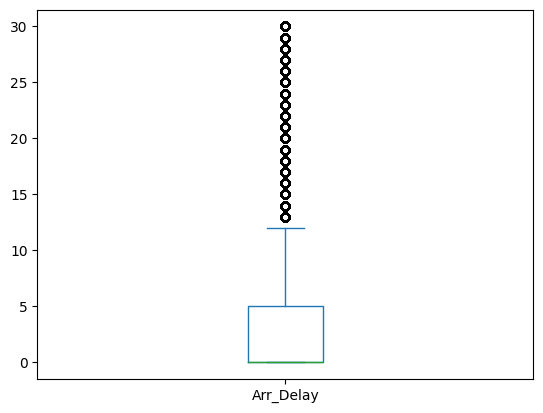

In [29]:
df[df["Arr_Delay"]<=dummy]["Arr_Delay"].plot.box()

In [30]:
df = df[df["Arr_Delay"]<=dummy]

In [31]:
df.shape

(108465, 23)

In [32]:
df["Class"].value_counts()

Class
Business    51331
Eco         49263
Eco Plus     7871
Name: count, dtype: int64

In [35]:
df["Gender"] = list(map(lambda x: 0 if x == "Female" else 1, df["Gender"]))

In [36]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay
0,satisfied,0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,satisfied,0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,1,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0


In [41]:
df["Customer Type"]=pd.get_dummies(df["Customer Type"], dtype="int", drop_first=False)["Loyal Customer"]

In [42]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay
0,satisfied,0,1,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,satisfied,0,1,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,0,1,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,0,1,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,1,1,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0


In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
ohe = OneHotEncoder()

In [46]:
ohe.fit([df["Type of Travel"]])

OneHotEncoder()

In [50]:
type = ohe.transform([df["Type of Travel"]]).toarray()

In [52]:
type.ravel()

array([1., 1., 1., ..., 1., 1., 1.])

In [53]:
df["Type of Travel"] = type.ravel()

In [54]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay
0,satisfied,0,1,65,1.0,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,satisfied,0,1,15,1.0,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,0,1,60,1.0,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,0,1,70,1.0,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,1,1,30,1.0,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0


In [55]:
df["Class"].value_counts()

Class
Business    51331
Eco         49263
Eco Plus     7871
Name: count, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

In [58]:
df["Class"] = le.fit_transform(df["Class"])

In [59]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Dept_Delay,Arr_Delay
0,satisfied,0,1,65,1.0,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
2,satisfied,0,1,15,1.0,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,0,1,60,1.0,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,0,1,70,1.0,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,1,1,30,1.0,1,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0


In [66]:
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Dept_Delay                           0
Arr_Delay                            0
dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [63]:
X = scaler.fit_transform(X)

In [64]:
X

array([[-0.98369444,  0.47715199,  1.67076835, ..., -1.04874924,
        -0.50698024, -0.53800315],
       [-0.98369444,  0.47715199, -1.63540858, ..., -1.04874924,
        -0.50698024, -0.53800315],
       [-0.98369444,  0.47715199,  1.34015066, ..., -0.2780782 ,
        -0.50698024, -0.53800315],
       ...,
       [-0.98369444, -2.09576826,  1.9352625 , ...,  0.49259283,
        -0.00841175, -0.53800315],
       [-0.98369444, -2.09576826, -1.89990273, ..., -1.04874924,
         0.11623037, -0.53800315],
       [-0.98369444, -2.09576826, -0.70967904, ..., -1.04874924,
        -0.50698024, -0.53800315]])

In [65]:
y

0         satisfied
2         satisfied
3         satisfied
4         satisfied
5         satisfied
            ...    
129869    satisfied
129871    satisfied
129872    satisfied
129874    satisfied
129875    satisfied
Name: satisfaction, Length: 108465, dtype: object

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=53)

In [69]:
model = LogisticRegression()

In [71]:
model.fit(X_train, y_train)

LogisticRegression()

In [72]:
model.score(X_train, y_train)

0.8318090180459261

In [73]:
y_pred = model.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred)

0.8345687207286941

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

dissatisfied       0.81      0.81      0.81     11851
   satisfied       0.85      0.86      0.85     15266

    accuracy                           0.83     27117
   macro avg       0.83      0.83      0.83     27117
weighted avg       0.83      0.83      0.83     27117



In [76]:
confusion_matrix(y_test, y_pred)

array([[ 9557,  2294],
       [ 2192, 13074]], dtype=int64)